In [144]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [146]:
df = pd.read_csv("wineQualityReds.csv")

In [124]:
numAttr = df.shape[1]

df_x = data.iloc[:,1:(numAttr-2)]
df_y = data.iloc[:,-1]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2, random_state=1)

In [126]:
x_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates
701,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79
863,7.2,0.62,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53
1387,7.4,0.64,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58


In [127]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [128]:
y_pred = rf.predict(x_test)

In [129]:
accuracy_score(y_test, y_pred).round(3)

0.694

# Feature Engineering

In [130]:
feat_imp_val = rf.feature_importances_
feat_imp_val = feat_imp_val.round(3)

In [131]:
feat_imp_dict = {}

for i, feature in enumerate(feat_imp_val):
    feat_imp_dict[df.columns[i]] = feature
feat_imp_dict

{'Unnamed: 0': 0.086,
 'chlorides': 0.075,
 'citric.acid': 0.084,
 'density': 0.089,
 'fixed.acidity': 0.111,
 'free.sulfur.dioxide': 0.12,
 'pH': 0.134,
 'residual.sugar': 0.091,
 'total.sulfur.dioxide': 0.12,
 'volatile.acidity': 0.09}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E17D42860>,
      dtype=object)

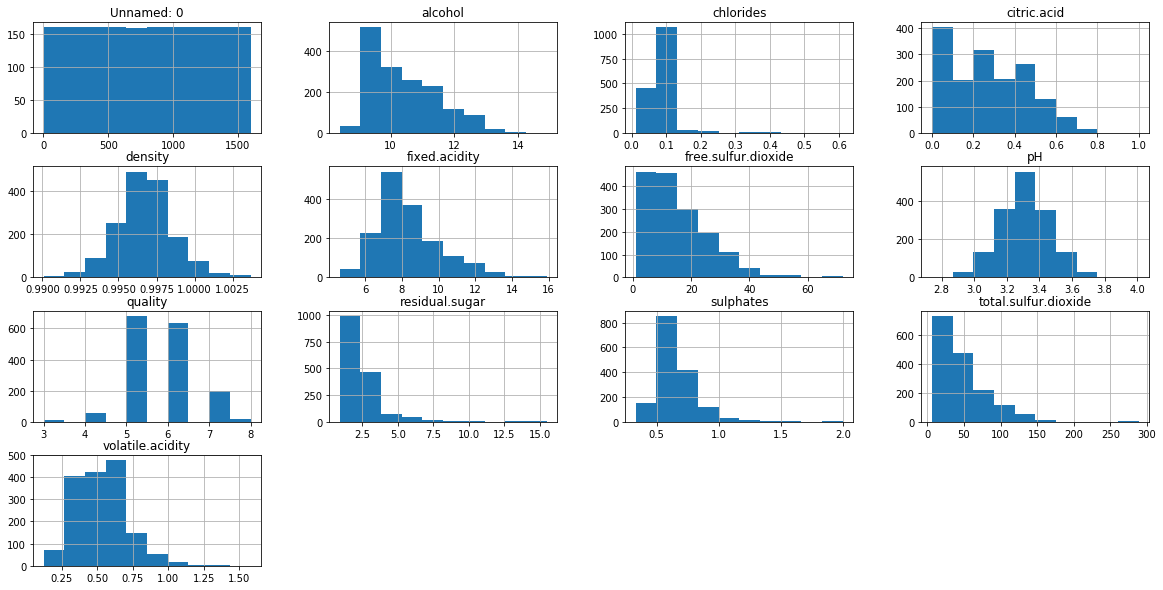

In [132]:
df.hist(figsize=(20,10))

In [133]:
new_feats = []

for x in feat_imp_dict:
    if feat_imp_dict[x] > .1:
        new_feats.append(x)

new_feats.append('quality')

In [134]:
df_feat_engr = df[new_feats]
df_feat_engr.head()

,free.sulfur.dioxide,pH,fixed.acidity,total.sulfur.dioxide,quality
0,11.0,3.51,7.4,34.0,5
1,25.0,3.20,7.8,67.0,5
2,15.0,3.26,7.8,54.0,5
3,17.0,3.16,11.2,60.0,6
4,11.0,3.51,7.4,34.0,5


In [135]:
df_feat_engr_x = df_feat_engr.iloc[:,:-1]
df_feat_engr_y = df_feat_engr.iloc[:,-1]

In [136]:
df_feat_engr_x.head()

,free.sulfur.dioxide,pH,fixed.acidity,total.sulfur.dioxide
0,11.0,3.51,7.4,34.0
1,25.0,3.20,7.8,67.0
2,15.0,3.26,7.8,54.0
3,17.0,3.16,11.2,60.0
4,11.0,3.51,7.4,34.0


In [137]:
df_feat_engr_y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [138]:
x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(df_feat_engr_x, df_feat_engr_y, test_size=.2, random_state=1)

In [139]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_feat_train,y_feat_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [140]:
y_feat_pred = rf.predict(x_feat_test)

In [141]:
accuracy_score(y_feat_test, y_feat_pred)

0.5875

###### lower accuracy 